In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"https://github.com/sriexp/Data-Analyst-Portfolio/raw/refs/heads/main/Pandas%20EDA/Data/amazon_sales_data%202025.csv")
df.head()

,Order ID,Date,Product,Category,Price,Quantity,Total Sales,Customer Name,Customer Location,Payment Method,Status
0,ORD0001,14-03-25,Running Shoes,Footwear,60,3,180,Emma Clark,New York,Debit Card,Cancelled
1,ORD0002,20-03-25,Headphones,Electronics,100,4,400,Emily Johnson,San Francisco,Debit Card,Pending
2,ORD0003,15-02-25,Running Shoes,Footwear,60,2,120,John Doe,Denver,Amazon Pay,Cancelled
3,ORD0004,19-02-25,Running Shoes,Footwear,60,3,180,Olivia Wilson,Dallas,Credit Card,Pending
4,ORD0005,10-03-25,Smartwatch,Electronics,150,3,450,Emma Clark,New York,Debit Card,Pending


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Order ID           250 non-null    object
 1   Date               250 non-null    object
 2   Product            250 non-null    object
 3   Category           250 non-null    object
 4   Price              250 non-null    int64 
 5   Quantity           250 non-null    int64 
 6   Total Sales        250 non-null    int64 
 7   Customer Name      250 non-null    object
 8   Customer Location  250 non-null    object
 9   Payment Method     250 non-null    object
 10  Status             250 non-null    object
dtypes: int64(3), object(8)
memory usage: 21.6+ KB


In [4]:
df.isnull().sum()

Order ID             0
Date                 0
Product              0
Category             0
Price                0
Quantity             0
Total Sales          0
Customer Name        0
Customer Location    0
Payment Method       0
Status               0
dtype: int64

In [5]:
df.columns = df.columns.str.replace(' ','_').str.lower()
df.columns

Index(['order_id', 'date', 'product', 'category', 'price', 'quantity',
       'total_sales', 'customer_name', 'customer_location', 'payment_method',
       'status'],
      dtype='object')

In [6]:
df.set_index('order_id',inplace=True)
df.head()

,date,product,category,price,quantity,total_sales,customer_name,customer_location,payment_method,status
order_id,,,,,,,,,,
ORD0001,14-03-25,Running Shoes,Footwear,60,3,180,Emma Clark,New York,Debit Card,Cancelled
ORD0002,20-03-25,Headphones,Electronics,100,4,400,Emily Johnson,San Francisco,Debit Card,Pending
ORD0003,15-02-25,Running Shoes,Footwear,60,2,120,John Doe,Denver,Amazon Pay,Cancelled
ORD0004,19-02-25,Running Shoes,Footwear,60,3,180,Olivia Wilson,Dallas,Credit Card,Pending
ORD0005,10-03-25,Smartwatch,Electronics,150,3,450,Emma Clark,New York,Debit Card,Pending


In [7]:
df['date'] = pd.to_datetime(df['date'],format='%d-%m-%y')

In [8]:
df['month'] = df.date.dt.month
df['year'] = df.date.dt.year
df['day_of_wk'] = df.date.dt.dayofweek

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 250 entries, ORD0001 to ORD0250
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               250 non-null    datetime64[ns]
 1   product            250 non-null    object        
 2   category           250 non-null    object        
 3   price              250 non-null    int64         
 4   quantity           250 non-null    int64         
 5   total_sales        250 non-null    int64         
 6   customer_name      250 non-null    object        
 7   customer_location  250 non-null    object        
 8   payment_method     250 non-null    object        
 9   status             250 non-null    object        
 10  month              250 non-null    int32         
 11  year               250 non-null    int32         
 12  day_of_wk          250 non-null    int32         
dtypes: datetime64[ns](1), int32(3), int64(3), object(6)
memory u

## Products

In [10]:
df['product'].unique()

array(['Running Shoes', 'Headphones', 'Smartwatch', 'T-Shirt',
       'Smartphone', 'Book', 'Jeans', 'Laptop', 'Washing Machine',
       'Refrigerator'], dtype=object)

<Axes: ylabel='count'>

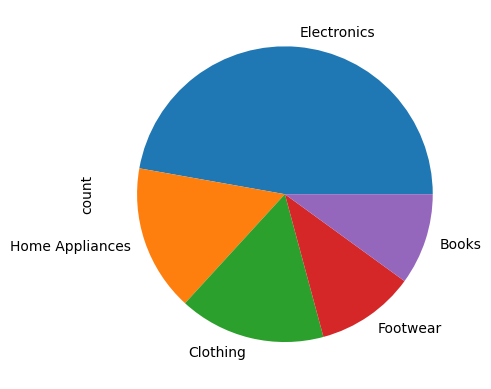

In [11]:
df['category'].value_counts().plot(kind='pie')

<Axes: xlabel='product'>

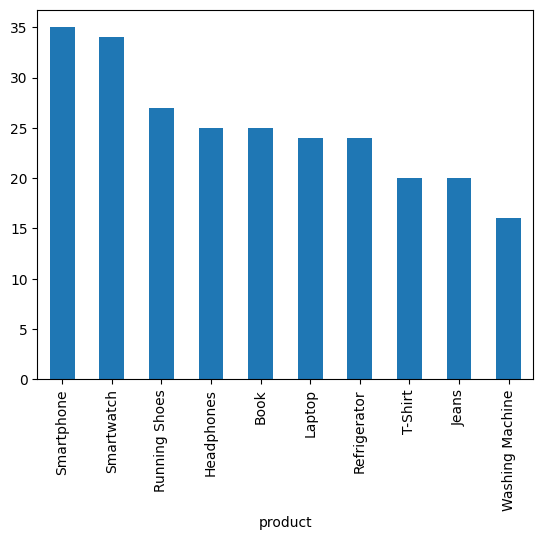

In [12]:
df['product'].value_counts().plot(kind = 'bar')

<Axes: >

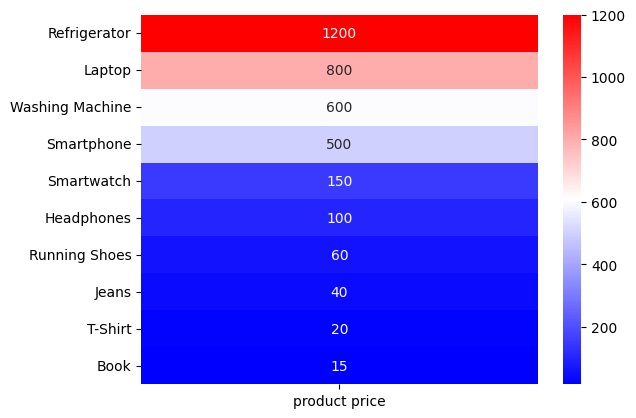

In [13]:
product_price = df.groupby('product')['price'].max().sort_values(ascending=False).reset_index()
sns.heatmap(product_price[['price']].values,xticklabels=['product price'], yticklabels=product_price['product'],annot=True,fmt='0.0f',cmap='bwr')


<Axes: >

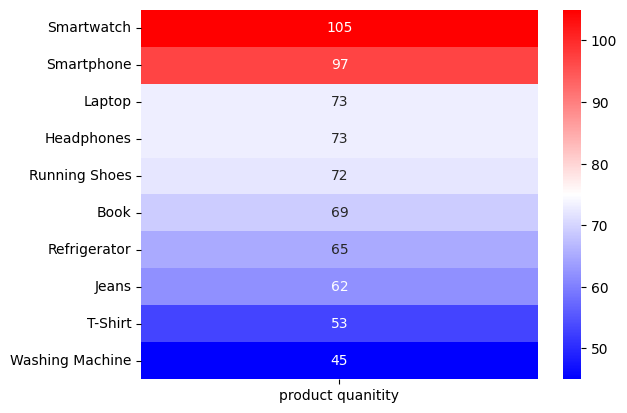

In [14]:
product_quantity = df.groupby('product')['quantity'].sum().sort_values(ascending=False).reset_index()
sns.heatmap(product_quantity[['quantity']].values,xticklabels=['product quanitity'], 
            yticklabels=product_quantity['product'],annot=True,fmt='0.0f',cmap='bwr')


<Axes: xlabel='product', ylabel='total_sales'>

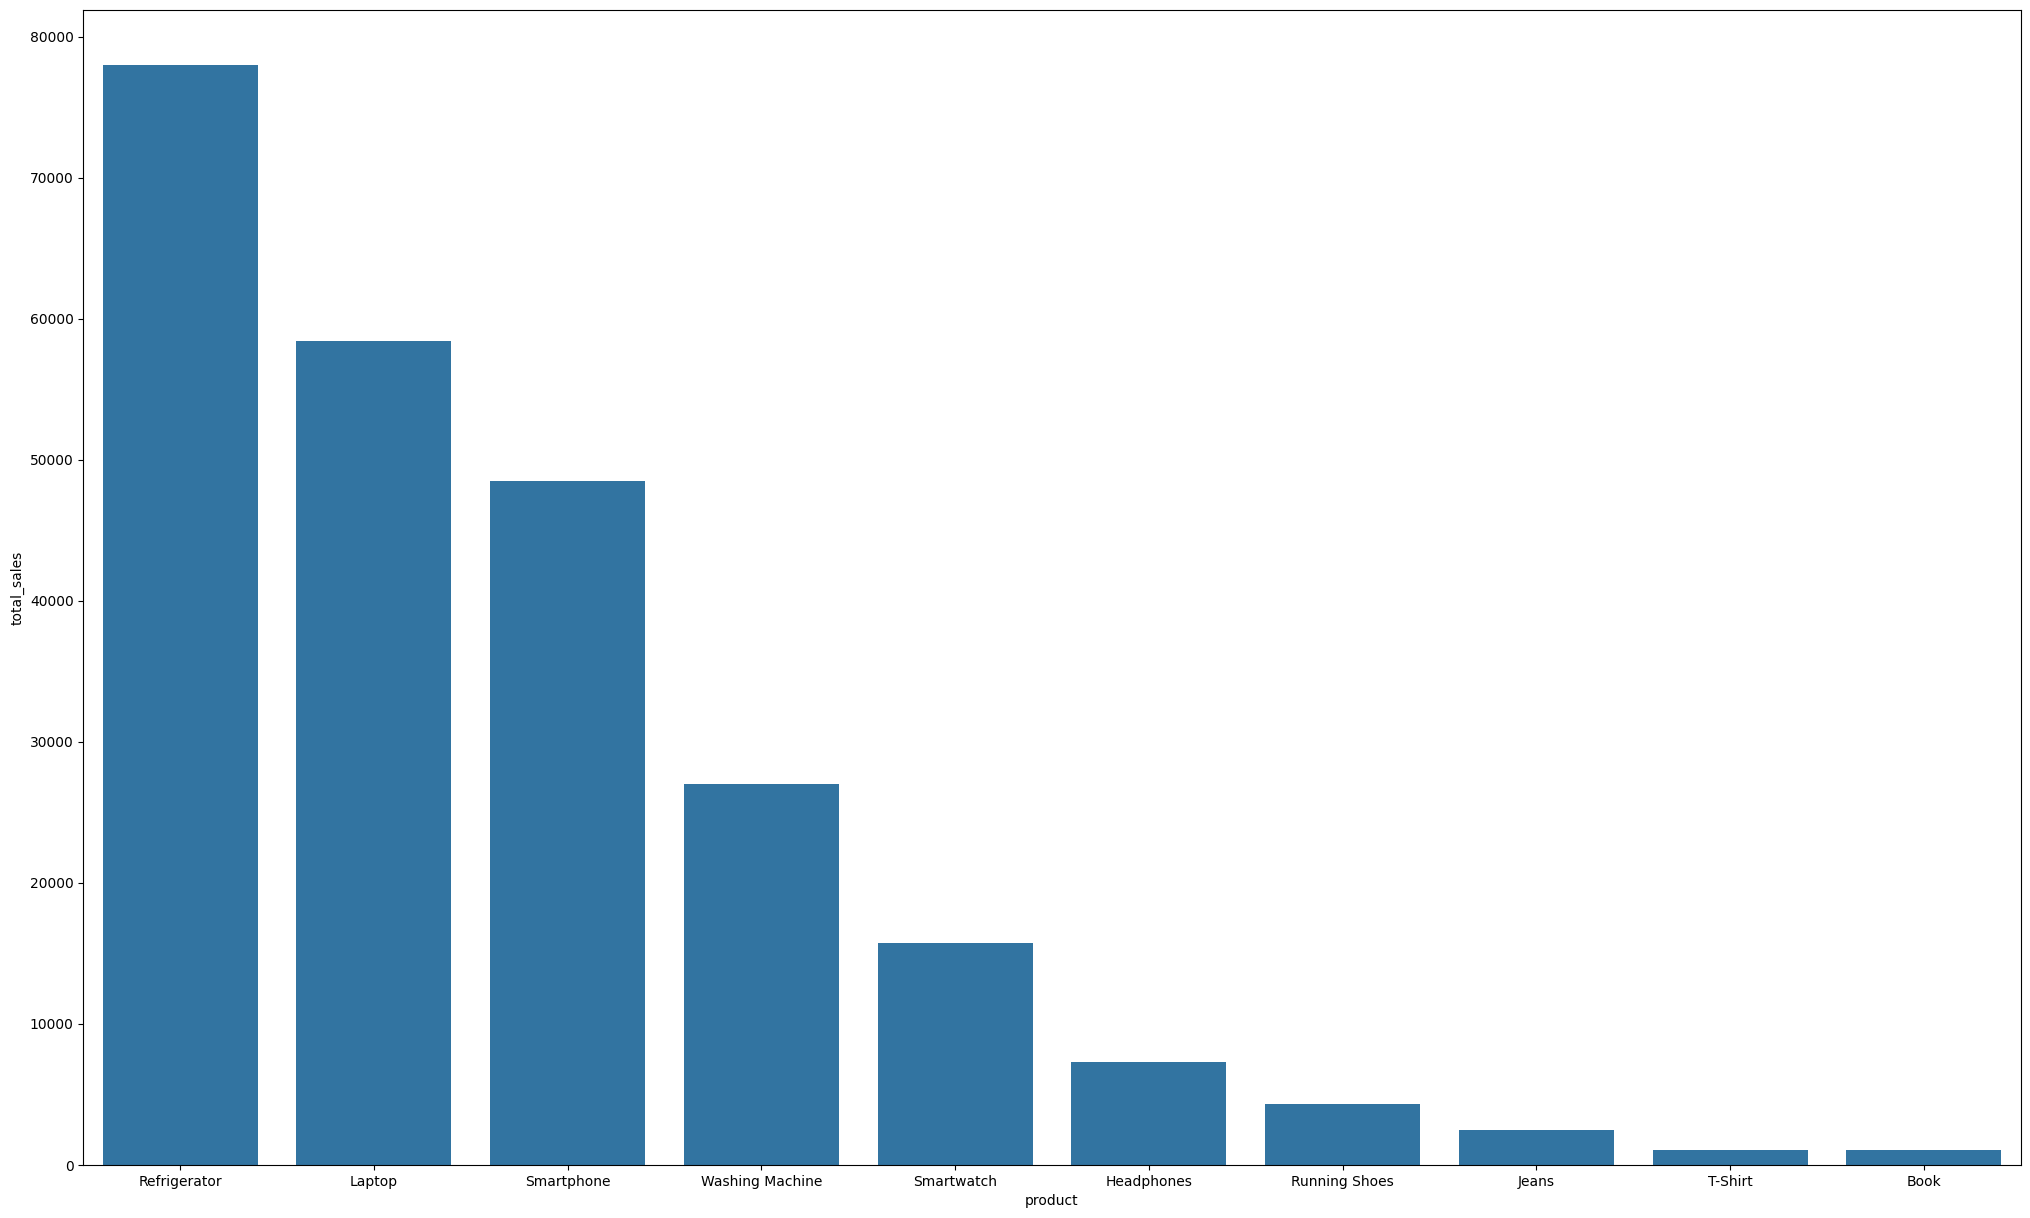

In [15]:
product_sales  = df.groupby('product')['total_sales'].sum().sort_values(ascending = False).reset_index()
plt.figure(figsize=(25,15))
sns.barplot(data = product_sales,x = 'product',y = 'total_sales')

## Completed Transactions

In [16]:
completed_transac = df[df['status'] == 'Completed']
completed_transac.head()

,date,product,category,price,quantity,total_sales,customer_name,customer_location,payment_method,status,month,year,day_of_wk
order_id,,,,,,,,,,,,,
ORD0007,2025-03-18,Smartwatch,Electronics,150,4,600,Emma Clark,Houston,PayPal,Completed,3,2025,1
ORD0008,2025-03-02,Smartphone,Electronics,500,1,500,Sophia Miller,Miami,PayPal,Completed,3,2025,6
ORD0009,2025-03-08,T-Shirt,Clothing,20,3,60,Sophia Miller,Boston,PayPal,Completed,3,2025,5
ORD0012,2025-03-13,Jeans,Clothing,40,4,160,Michael Brown,Dallas,Credit Card,Completed,3,2025,3
ORD0015,2025-02-20,Smartwatch,Electronics,150,4,600,John Doe,Seattle,Credit Card,Completed,2,2025,3


In [17]:
completed_transac['product'].value_counts()

product
Smartwatch         14
Smartphone         14
Running Shoes      10
T-Shirt             9
Refrigerator        9
Laptop              9
Headphones          7
Jeans               6
Book                6
Washing Machine     4
Name: count, dtype: int64

<Axes: title={'center': 'Total quantity Purchased among completed Transactions'}, xlabel='product', ylabel='quantity'>

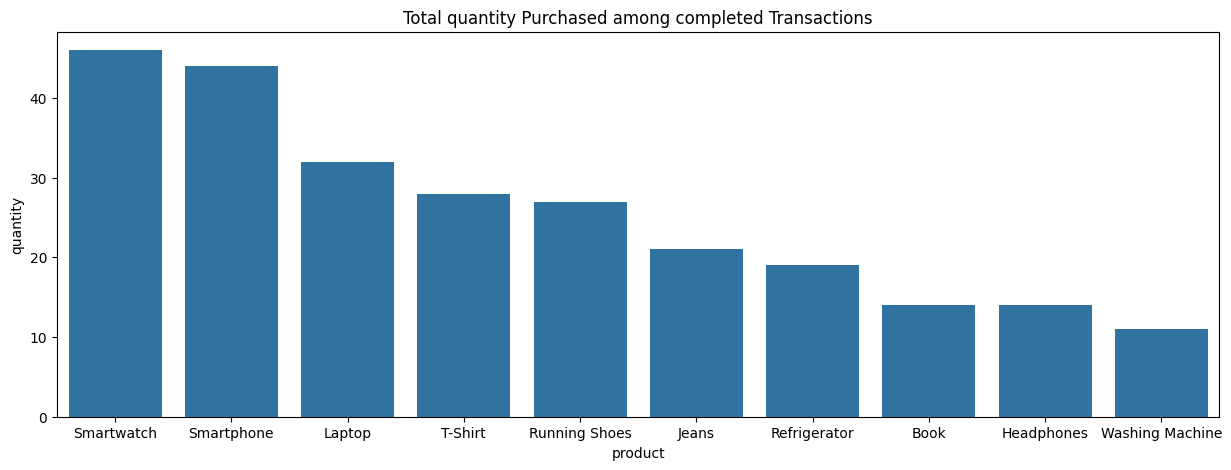

In [18]:
com_pdt_qty = completed_transac.groupby('product')['quantity'].sum().sort_values(ascending = False).reset_index()

plt.figure(figsize=(15,5))
plt.title("Total quantity Purchased among completed Transactions")
sns.barplot(x = com_pdt_qty['product'],y = com_pdt_qty['quantity'],data = com_pdt_qty)

<Axes: >

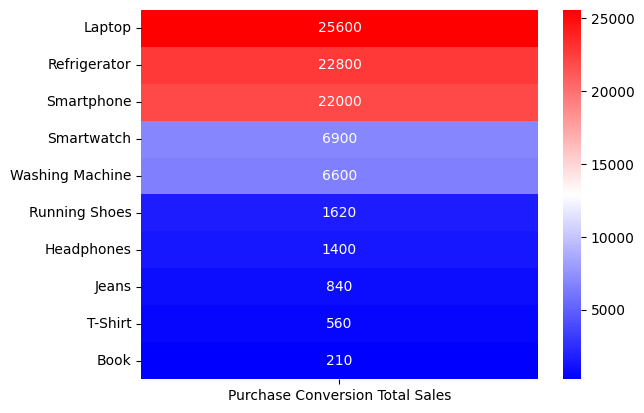

In [19]:
comp_pdt_sales = completed_transac.groupby('product')['total_sales'].sum().sort_values(ascending = False).reset_index()

sns.heatmap(comp_pdt_sales[['total_sales']].values, cmap='bwr',
    fmt="0.0f",annot=True,
    yticklabels=comp_pdt_sales['product'],xticklabels=["Purchase Conversion Total Sales"]
            )

comparison between the number of products that were added to cart vs number of products purchased.<br>
calculating percentage of completed transactions, essentially the rate of conversion into a successful purchase for each product

In [20]:
df1 = completed_transac.groupby('product')['quantity'].sum().sort_values(ascending = False).reset_index()
df1.columns = ['product','status_complete_qty']
df2 = df.groupby('product')['quantity'].sum().sort_values(ascending = False).reset_index()
qty_analysis = df1.merge(df2,on = 'product')
qty_analysis['completion_percent'] = round((qty_analysis['status_complete_qty']/qty_analysis['quantity'])*100,2)
qty_analysis.sort_values('completion_percent',ascending=False,inplace=True)

<Axes: >

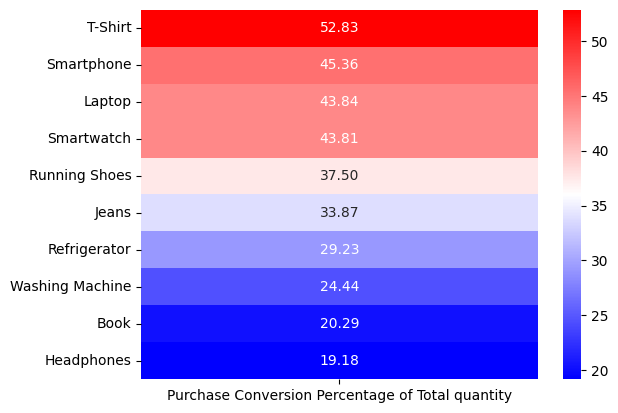

In [21]:
sns.heatmap(qty_analysis[['completion_percent']].values,cmap='bwr',
    fmt=".2f",annot=True,
    yticklabels=qty_analysis['product'], xticklabels=["Purchase Conversion Percentage of Total quantity"]
            )

In [22]:
#Analysing customer location data

df1 = df['customer_location'].value_counts().reset_index()
df2 = completed_transac['customer_location'].value_counts().reset_index()
df2.columns = ['customer_location','completed_count']
city_analysis = df1.merge(df2,on = 'customer_location')
city_analysis['comp_percentage'] = (city_analysis['completed_count']/city_analysis['count'])*100
city_analysis.sort_values('comp_percentage',ascending=False)

,customer_location,count,completed_count,comp_percentage
0,Houston,32,17,53.125000
9,Los Angeles,17,7,41.176471
4,Boston,26,10,38.461538
5,Denver,26,10,38.461538
2,Dallas,29,10,34.482759
1,Miami,31,10,32.258065
7,Seattle,22,7,31.818182
6,Chicago,22,7,31.818182
3,New York,26,6,23.076923
8,San Francisco,19,4,21.052632


Therefore, Houston is the city with maximum conversion rate, followed by Los Angeles and Boston.

<Axes: xlabel='payment_method'>

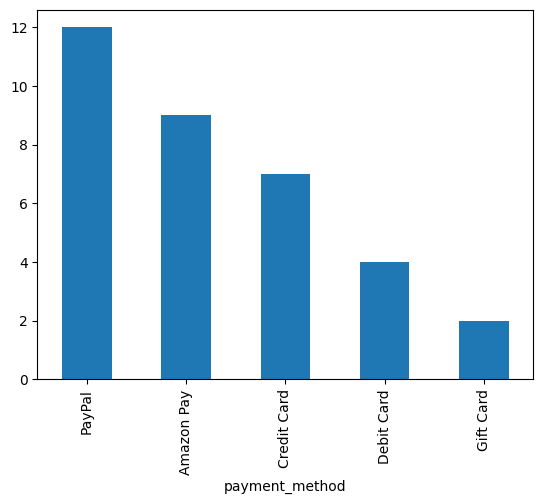

In [23]:
#Analysing most popular payment methods in these top 3 locations.

top3_cities = city_analysis.sort_values('comp_percentage',ascending=False).head(3)['customer_location'].values
top3_cities = df[(df['customer_location'].isin(top3_cities)) & (df['status']=='Completed')]
top3_cities['payment_method'].value_counts().plot(kind='bar')

PayPal is the most commonly used payment method in the top 3 cities